1) Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

2) Explore Data

In [4]:
df=pd.read_json("/home/yechnk-amalajit/News_Category_Dataset_v2.json",lines=True)[['headline','category']]
df.head()

,headline,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT


In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (200853, 2)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  200853 non-null  object
 1   category  200853 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [7]:
df['category'].value_counts()

category
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: c

<Axes: xlabel='category'>

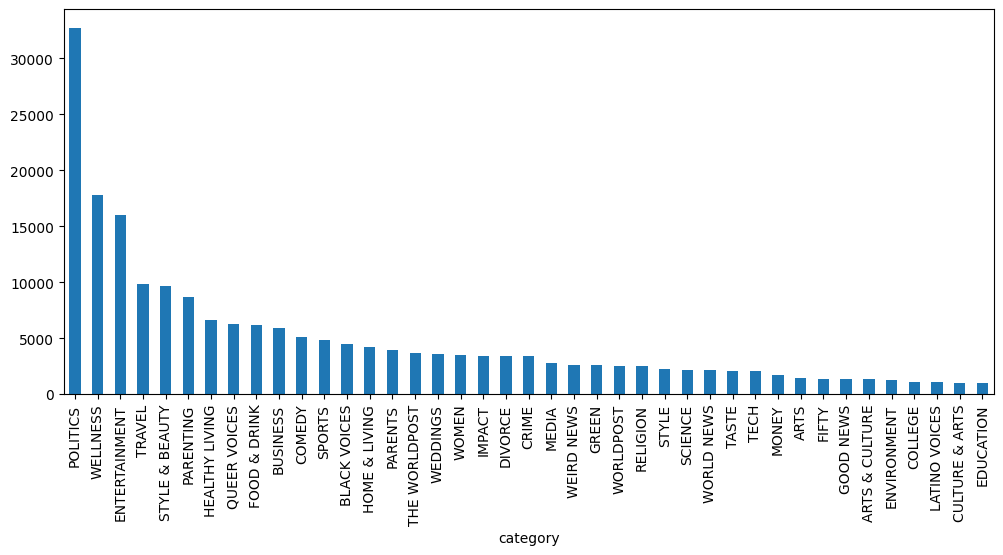

In [8]:
df['category'].value_counts().plot(kind='bar', figsize=(12, 5))


In [9]:
df['category'].value_counts(normalize=True)


category
POLITICS          0.163000
WELLNESS          0.088756
ENTERTAINMENT     0.079949
TRAVEL            0.049225
STYLE & BEAUTY    0.048040
PARENTING         0.043201
HEALTHY LIVING    0.033328
QUEER VOICES      0.031436
FOOD & DRINK      0.030998
BUSINESS          0.029559
COMEDY            0.025765
SPORTS            0.024316
BLACK VOICES      0.022544
HOME & LIVING     0.020886
PARENTS           0.019691
THE WORLDPOST     0.018242
WEDDINGS          0.018177
WOMEN             0.017376
IMPACT            0.017222
DIVORCE           0.017057
CRIME             0.016953
MEDIA             0.014015
WEIRD NEWS        0.013293
GREEN             0.013054
WORLDPOST         0.012840
RELIGION          0.012726
STYLE             0.011222
SCIENCE           0.010844
WORLD NEWS        0.010839
TASTE             0.010435
TECH              0.010366
MONEY             0.008499
ARTS              0.007513
FIFTY             0.006975
GOOD NEWS         0.006960
ARTS & CULTURE    0.006667
ENVIRONMENT       0

In [10]:
categories = ['CRIME', 'COMEDY', 'EDUCATION', 'SPORTS','WOMEN']
df_new = df[df['category'].isin(categories)]
df_new.head()

,headline,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
32,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME
35,Morgan Freeman Dropped From Marketing Campaign...,WOMEN
37,Trump's New 'MAGA'-Themed Swimwear Sinks On Tw...,COMEDY
38,Seth Meyers Has 1 Funny Regret After Trump Can...,COMEDY


In [ ]:
df_new['category'].value_counts() # class with imbalanced data

category
COMEDY       5175
SPORTS       4884
WOMEN        3490
CRIME        3405
EDUCATION    1004
Name: count, dtype: int64

In [12]:
df.isna().sum() # data quality check, how many missing value exist per column in the DataFrame.


headline    0
category    0
dtype: int64

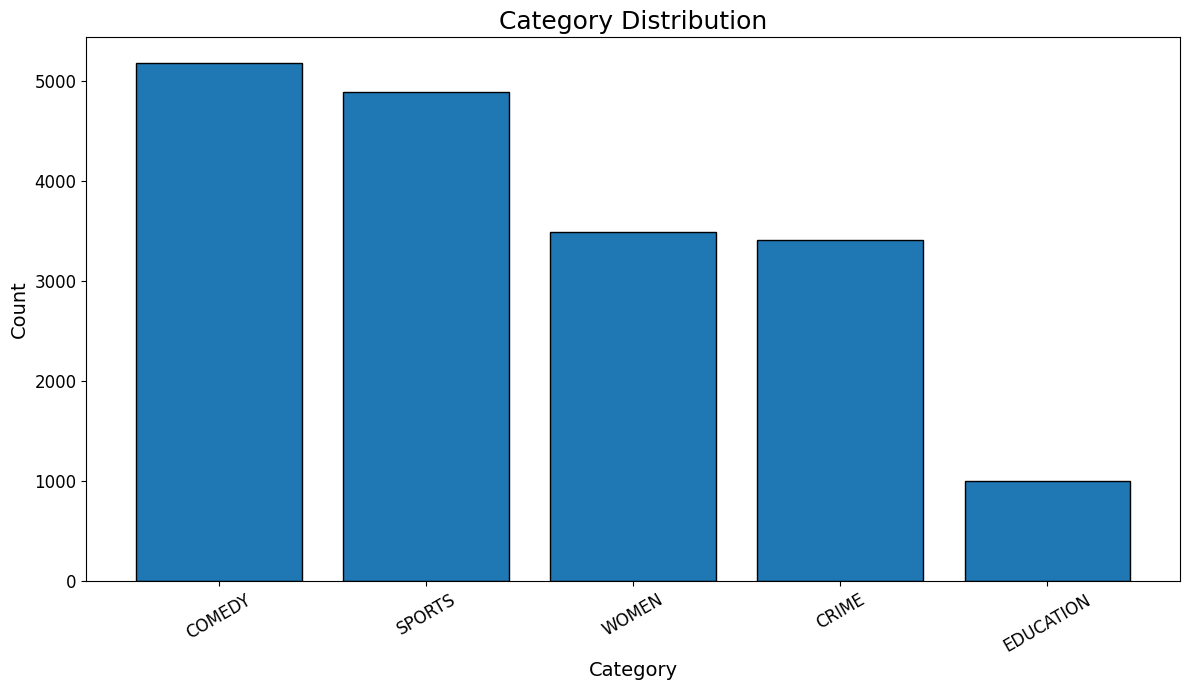

In [13]:
counts = df_new['category'].value_counts()

plt.figure(figsize=(12, 7))

plt.bar(counts.index, counts.values, edgecolor='black')

plt.title("Category Distribution", fontsize=18)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

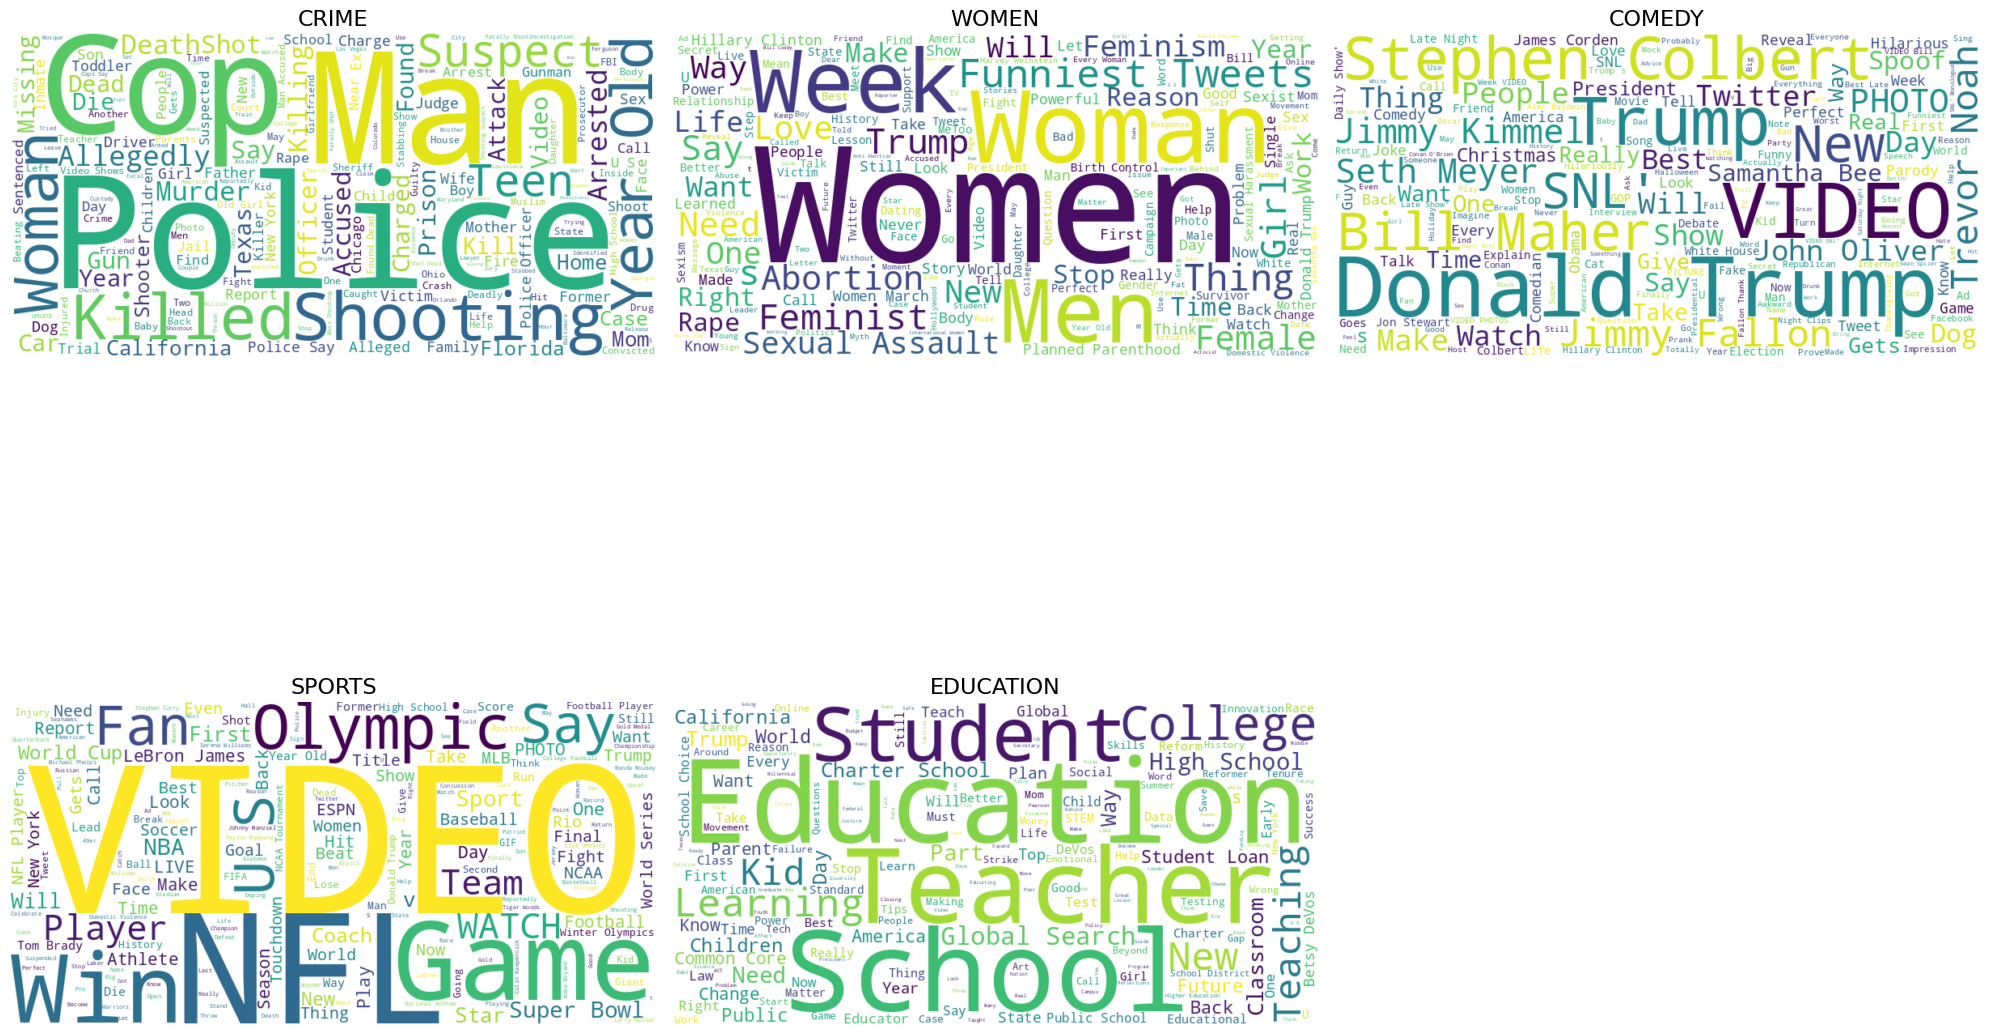

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categories = df_new['category'].unique()

plt.figure(figsize=(20,15))
for i, cat in enumerate(categories, 1):
    text = ' '.join(df_new[df_new['category'] == cat]['headline'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.subplot(2,3,i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(cat, fontsize=16)
plt.tight_layout()
plt.show()

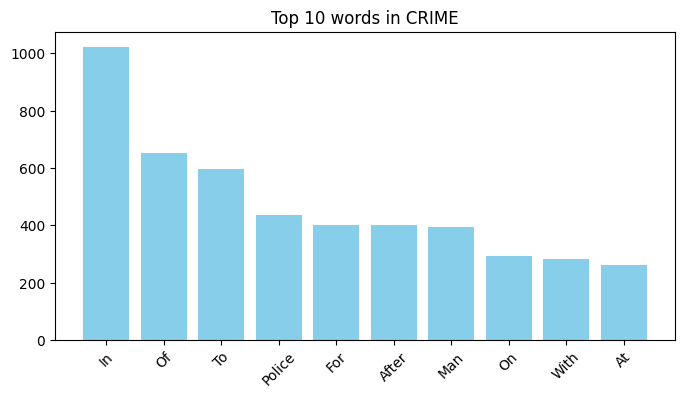

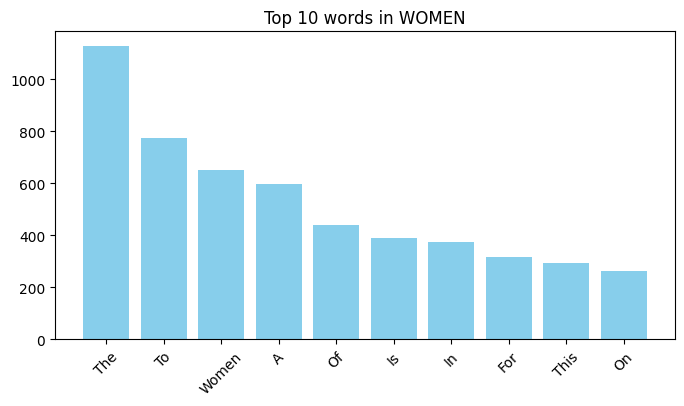

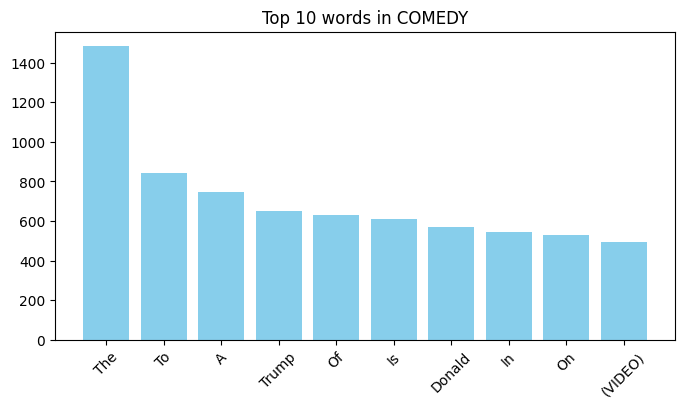

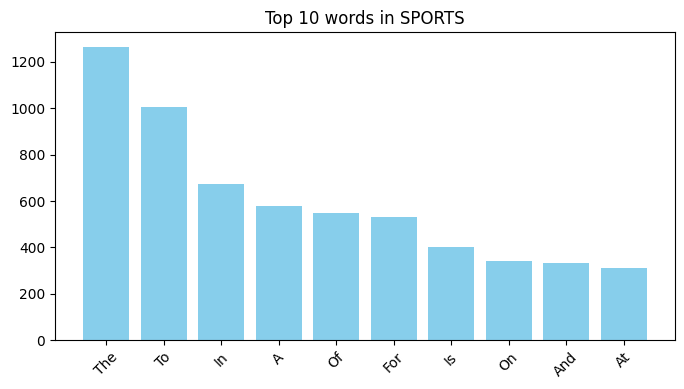

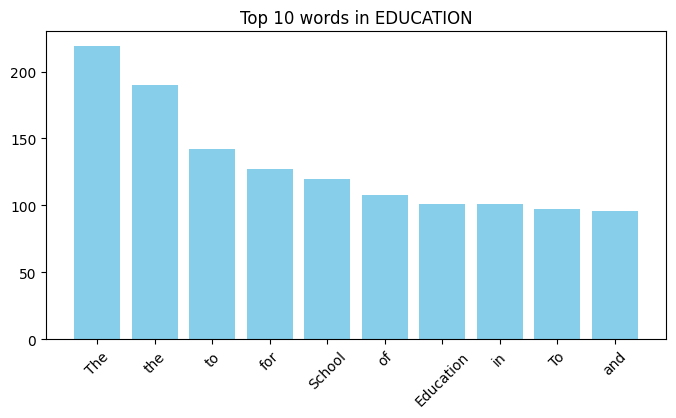

In [15]:
from collections import Counter

for cat in categories:
    text = ' '.join(df_new[df_new['category'] == cat]['headline']).split()
    common_words = Counter(text).most_common(10)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(8,4))
    plt.bar(words, counts, color='skyblue')
    plt.title(f'Top 10 words in {cat}')
    plt.xticks(rotation=45)
    plt.show()

3) Text Cleaning

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Ensure it's string
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoin to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [17]:
df_new['headline']=df_new['headline'].apply(clean_text)
df_new['headline'].head()

0                      mass shooting texas last week tv
32      rachel dolezal face felony charge welfare fraud
35    morgan freeman dropped marketing campaign hara...
37           trump new magathemed swimwear sink twitter
38    seth meyers funny regret trump cancel north ko...
Name: headline, dtype: object

4) Model Building with Multinomial Naive Bayes Algorithm

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

5) Encode Labels

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df_new['category'])  

6) Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Training set = 80%, Testing set = 20%
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df_new['headline'], y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [21]:
print(X_train_text.shape)
print(X_test_text.shape)
print(y_train.shape)
print(y_test.shape)

(14366,)
(3592,)
(14366,)
(3592,)


7) SMOTE for balancing
(Synthetic Minority Oversampling Technique)

In [ ]:
from sklearn.utils import resample
# balancing by artificial samples to prevent model bias towards majority class
# Combine X_train_text and y_train into a DataFrame
train_df = pd.DataFrame({
    'text': X_train_text.values,  # ensure it's an array
    'label': y_train
})

# Check original class distribution
print("Before balancing:")
print(train_df['label'].value_counts())

# Manual upsampling to balance classes
max_count = train_df['label'].value_counts().max()
balanced_train_df = pd.DataFrame()

for label in train_df['label'].unique():
    temp = train_df[train_df['label'] == label]
    temp_resampled = resample(temp, replace=True, n_samples=max_count, random_state=42)
    balanced_train_df = pd.concat([balanced_train_df, temp_resampled])

# Separate features and labels
X_train_res = balanced_train_df['text'].values
y_train_res = balanced_train_df['label'].values

# Check new distribution
print("After manual balancing:")
print(np.bincount(y_train_res))

Before balancing:
label
0    4140
3    3907
4    2792
1    2724
2     803
Name: count, dtype: int64
After manual balancing:
[4140 4140 4140 4140 4140]


8) TF-IDF Vectorizer

In [23]:
tfidf = TfidfVectorizer(max_features=4000, ngram_range=(1,2))
X_train_res = tfidf.fit_transform(X_train_res)
X_test_tfidf = tfidf.transform(X_test_text)

9) Train Multinomial Naive Bayes Model

In [24]:
model = MultinomialNB()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_tfidf)

In [25]:
# Training accuracy
print("Train Accuracy:", model.score(X_train_res, y_train_res))

# Test accuracy
print("Test Accuracy:", model.score(X_test_tfidf, y_test))

Train Accuracy: 0.9023671497584541
Test Accuracy: 0.7937082405345212


10) Evaluation

In [26]:
print("===== Classification Report =====")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))

===== Classification Report =====
              precision    recall  f1-score   support

      COMEDY     0.8240    0.7643    0.7930      1035
       CRIME     0.8189    0.8899    0.8529       681
   EDUCATION     0.6295    0.7861    0.6991       201
      SPORTS     0.8467    0.8086    0.8272       977
       WOMEN     0.7147    0.7249    0.7198       698

    accuracy                         0.7937      3592
   macro avg     0.7668    0.7947    0.7784      3592
weighted avg     0.7971    0.7937    0.7942      3592



In [27]:
print(classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True))

{'COMEDY': {'precision': 0.8239583333333333, 'recall': 0.7642512077294686, 'f1-score': 0.7929824561403509, 'support': 1035.0}, 'CRIME': {'precision': 0.8189189189189189, 'recall': 0.8898678414096917, 'f1-score': 0.8529204785362421, 'support': 681.0}, 'EDUCATION': {'precision': 0.6294820717131474, 'recall': 0.7860696517412935, 'f1-score': 0.6991150442477876, 'support': 201.0}, 'SPORTS': {'precision': 0.8467309753483387, 'recall': 0.8085977482088025, 'f1-score': 0.8272251308900523, 'support': 977.0}, 'WOMEN': {'precision': 0.7146892655367232, 'recall': 0.7249283667621776, 'f1-score': 0.7197724039829303, 'support': 698.0}, 'accuracy': 0.7937082405345212, 'macro avg': {'precision': 0.7667559129700923, 'recall': 0.7947429631702868, 'f1-score': 0.7784031027594727, 'support': 3592.0}, 'weighted avg': {'precision': 0.7970812431676187, 'recall': 0.7937082405345212, 'f1-score': 0.7941809306074377, 'support': 3592.0}}


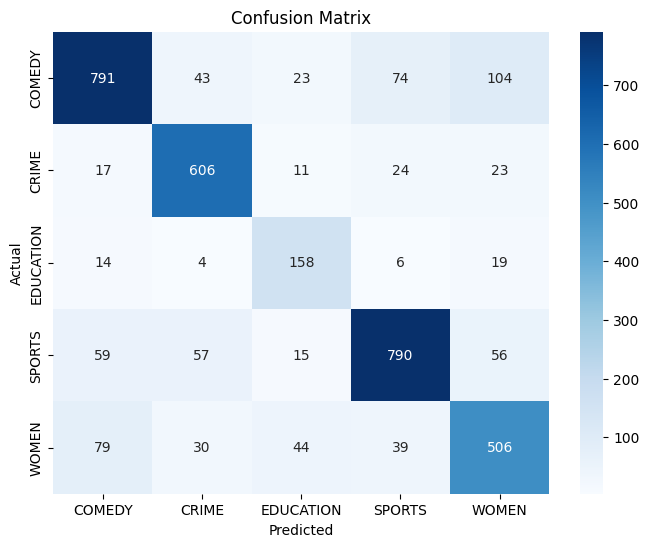

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


11) Hyperparameter Tuning for MultinomialNB + TF-IDF

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Use raw balanced training text and labels
X_train_text_balanced = balanced_train_df['text'].values
y_train_balanced = balanced_train_df['label'].values

# Build pipeline: TF-IDF vectorizer + MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),   # raw text input
    ('nb', MultinomialNB())
])

# Define hyperparameter grid
param_grid = {
    'tfidf__max_features': [3000, 4000, 5000], # Vocabulary size
    'tfidf__ngram_range': [(1,1), (1,2)], #
    'nb__alpha': [0.5, 1.0, 1.5] # smoothing parameter, Laplace smoothing for MultinomialNB
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_macro',   # balanced evaluation across classes
    n_jobs=-1
)

# Fit grid search
grid.fit(X_train_text_balanced, y_train_balanced)

# Display best hyperparameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validated F1-macro:", grid.best_score_)


Best parameters: {'nb__alpha': 0.5, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best cross-validated F1-macro: 0.8838722125628651


12) Model and Vectorizer Saving

In [ ]:
import os
import pickle

#  avoid retrainig the model, just save the best model and label encoder, ready for deployment.

# Create artifacts directory
ARTIFACTS_DIR = "api/artifacts"
os.makedirs(ARTIFACTS_DIR, exist_ok=True)

# Save the trained pipeline
with open(os.path.join(ARTIFACTS_DIR, "model.pkl"), "wb") as f:
    pickle.dump(grid.best_estimator_, f)

# Save the LabelEncoder
with open(os.path.join(ARTIFACTS_DIR, "label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)

print("Pipeline and LabelEncoder saved successfully!")


Pipeline and LabelEncoder saved successfully!


13) Load Model & Make Custom Predictions

In [79]:
import pickle
import os

ARTIFACTS_DIR = "api/artifacts"

# Load pipeline
with open(os.path.join(ARTIFACTS_DIR, "model.pkl"), "rb") as f:
    model = pickle.load(f)

# Load label encoder
with open(os.path.join(ARTIFACTS_DIR, "label_encoder.pkl"), "rb") as f:
    le = pickle.load(f)

# New examples
new_headlines = [
    "Local team wins national championship",
    "Government investigates recent cybercrime incident",
    "Top 10 tips for online learning success",
    "Stand-up comedy show draws large crowd",
    "Russia launches new space mission"
]

# Make predictions (this returns integer labels)
pred_labels = model.predict(new_headlines)

# Decode to original category names
pred_categories = le.inverse_transform(pred_labels)

# Display predictions
for headline, category in zip(new_headlines, pred_categories):
    print(f"Headline: '{headline}' → Predicted Category: {category}")


Headline: 'Local team wins national championship' → Predicted Category: 3
Headline: 'Government investigates recent cybercrime incident' → Predicted Category: 1
Headline: 'Top 10 tips for online learning success' → Predicted Category: 2
Headline: 'Stand-up comedy show draws large crowd' → Predicted Category: 0
Headline: 'Russia launches new space mission' → Predicted Category: 2
